# Polynomial Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
currentDirectory = os.getcwd()
currentDirectory

'C:\\Users\\Samir\\Desktop\\@ML\\Upload\\Polynomial Regression'

In [3]:
dataset = pd.read_csv('Data Set\\Position_Salaries.csv')

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

Here X is created as vector.We want to consider matrix of feature to be considered as a matrix only and not as a vector.

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

**About the dataset**

There is human resource team working for a big comapanny and are to hire new employ.The employ is good fit for job and we are going to offer the job.Now it's time to negotiate for future salary.The dataset contains various job positions along with there level and there corresponding Salaries.For example take a level between 6 and 7 i.e. 6.5. And the person is telling that he is getting 160k. So we need to find whether he is bluffing or not.

Machine needs to learn the relation between level and the salary.

we don't need to split the dataset into training and test set as 1) There are less number of observations. 2)We want to make a very accurate predictions with maximum information we can have. 

Linear Regression Library does feature scaling itself so no need to do here.

In [8]:
#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lin_reg.predict([[6.5]])

array([330378.78787879])

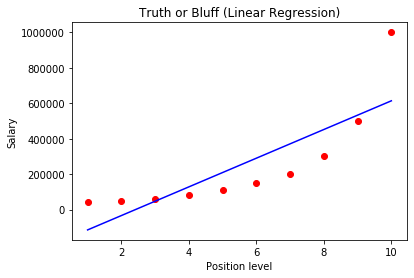

In [10]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)#we created a matrix a polynomial of degree 2

In [12]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [13]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

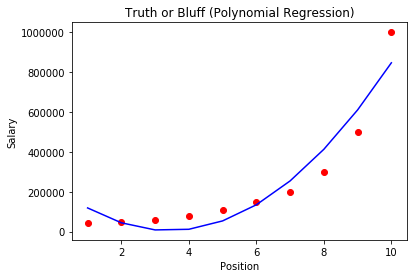

In [14]:
#Visualing the Polynomial regression Results
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue')#prediction#Plot predicted value with respect to X # *star
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [15]:
poly_predicted_Value_2 = lin_reg_2.predict(poly_reg.fit_transform(X))
poly_predicted_Value_2

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

poly_reg is a tool that will transform matrix of feature X into the matrix of feature X_poly by adding the additional polynomial terms into the matrix X

we will include this fit(matrix) in **multiple Linear Regression Model**.

We will not replace lin_reg by lin_reg_2 simply because as lin_reg is object of simple linear regression class and not polynomial regression class.We transformed X to X_poly.


*star : plt.plot(X,lin_reg_2.predict(X),color = 'blue') VS plt.plot(X,poly_reg.fit_transform(X),color = 'blue')

Suppose we bring change in X then it will not be directly displayed in X_poly as it was already defined for matrix for feature X. If we try to add new observations to the X and want that it is automtically fited then we should use **poly_reg.fit_transform(X)**

**Degree 3**

In [16]:
#Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)#we created a matrix a polynomial of degree 3

In [17]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

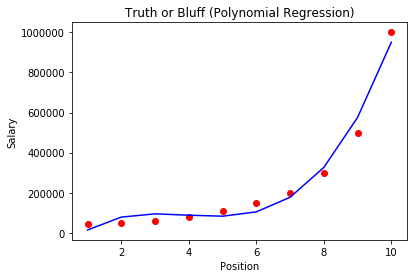

In [18]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly,y)
#Visualing the Polynomial regression Results with degree 3
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_3.predict(poly_reg.fit_transform(X)),color = 'blue')#prediction#Plot predicted value with respect to X # *star
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [19]:
poly_predicted_Value_3 = lin_reg_3.predict(poly_reg.fit_transform(X))
poly_predicted_Value_3

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

**Degree 4**

In [20]:
#Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)#we created a matrix a polynomial of degree 4
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

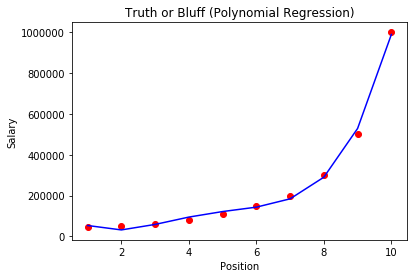

In [21]:
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly,y)
#Visualing the Polynomial regression Results with degree 4
#_________________________________________________________
#Higher resolution 0.1 step
X_grid = np.arange(min(X),max(X),0.1)#Gives range from lower bound to upper bound with 0.1 step size
X_grid = X_grid.reshape((len(X_grid),1))#Changing the vector produced above to matrix
#_________________________________________________________
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_4.predict(poly_reg.fit_transform(X)),color = 'blue')#prediction#Plot predicted value with respect to X # *star
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [22]:
poly_predicted_Value_4 = lin_reg_4.predict(poly_reg.fit_transform(X))
poly_predicted_Value_4

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

In [23]:
lin_reg_4.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])